### 공통요인분석(CFA)

In [1]:
# 필요한 패키지 설치
!pip install factor-analyzer
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

     ---------------------------------------- 42.5/42.5 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 202.8/202.8 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 14.5 MB/s eta 0:00:00
     ---------------------------------------- 98.8/98.8 kB 5.5 MB/s eta 0:00:00
     ------------------------------------- 468.5/468.5 kB 28.6 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42552 sha256=76e23f78d561c4ed744d51da03b5a1bc0c869d94898904dd30adc32962580ad0
  Stored in directory: c:\users\qorud\appdata\local\pip\cache\wheels\dc\d9\72\5261b2f7c80c1de8c85a0

In [2]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/nba2021_advanced.csv")

# 데이터 샘플 확인
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [3]:
# 변수 선택 및 데이터 스케일 정규화

# 요인 분석 할 칼럼만 선택 (문자형 변수 등 제거)
df1 = df.drop(['Player','Pos','Tm','Age'], axis='columns')

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)

# 컬럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns=df1.columns)

df_minmax.head()

#CFA를 하기 전에 데이터 정제를 헀다.
#우선 문자형 변수인 player,pos,Tm 칼럼과 성격이 다른 Age 칼럼을 제거한다.
#연령변수는 별도의 특징이 명확하기 때문에 개별적인 독립변수로 사용하기 위해 공통요인분석에 사용하지 않는다.
#PCA에서 했던 방식과 동일하게 정규화 스케일링을 적용한다.

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0.931034,0.369427,0.703518,0.399333,0.000,0.202850,0.300000,0.365989,0.550000,0.143158,...,0.161,0.450382,0.245902,0.318182,0.239437,0.836054,0.688192,0.552147,0.677419,0.146341
1,0.172414,0.013649,0.427136,0.083333,0.250,0.000000,0.000000,0.336414,0.335714,0.282105,...,0.000,0.450382,0.180328,0.045455,0.098592,0.587075,0.452030,0.245399,0.402458,0.146341
2,0.896552,0.689718,0.713568,0.394667,0.006,0.148856,0.482857,0.332717,0.625000,0.212632,...,0.201,0.274809,0.393443,0.272727,0.352113,0.841497,0.738007,0.503067,0.706605,0.219512
3,0.862069,0.792539,0.798995,0.427333,0.015,0.175853,0.194286,0.428835,0.550000,0.587368,...,0.162,0.575064,0.573770,0.636364,0.619718,0.900680,0.793358,0.687117,0.798771,0.536585
4,0.586207,0.434941,0.704774,0.361333,0.298,0.034871,0.091429,0.258780,0.300000,0.240000,...,0.064,0.516539,0.229508,0.272727,0.211268,0.818367,0.745387,0.503067,0.712750,0.219512


In [4]:
# 바틀렛(Bartlett)테스트
chi_square_value,p_value=calculate_bartlett_sphericity(df_minmax)

# 카이스퀘어, P-value 확인
chi_square_value, p_value

#각 변수들 사이의 상관계수의 적합성 검정을 위해 바틀렛 테스트를 수행했다.
#아웃풋 결과의 p-value가 0.5보다 작은 0.0이기에 공통분석요인을 하기에 적합한 것을 알 수 있다.

(20174.08269511383, 0.0)

In [5]:
# KMO 검정
kmo_all,kmo_test=calculate_kmo(df_minmax)
kmo_test

#변수 그룹간의 상관관계가 각각 다르게 나뉘는지 확인하기 위해 KMO 검정을 수행한다.
#0.7로 '약간 높음'수준이므로 준수한 수준인 것을 알 수 있다.

C:\Users\qorud\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7017388419159104

In [6]:
# 전체 요인적재값 확인

fa = FactorAnalyzer(n_factors=30,rotation=None)
fa.fit(df_minmax)
ev, v = fa.get_eigenvalues()

np.round_(ev,2)

#요인의 개수 선정을 하기 전에 전체 요인 적재 값을 확인한다.
#전체 칼럼 개수만큼의 요인별 적재값이 산출된다.
#지수표현 형태는 가독성이 떨어지므로 np.round()함수로 반올림하여 요인 적재 값을 확인한다.

array([7.91, 3.53, 2.25, 1.59, 1.45, 1.05, 0.86, 0.67, 0.59, 0.57, 0.45,
       0.37, 0.24, 0.17, 0.11, 0.08, 0.07, 0.03, 0.01, 0.  , 0.  , 0.  ])

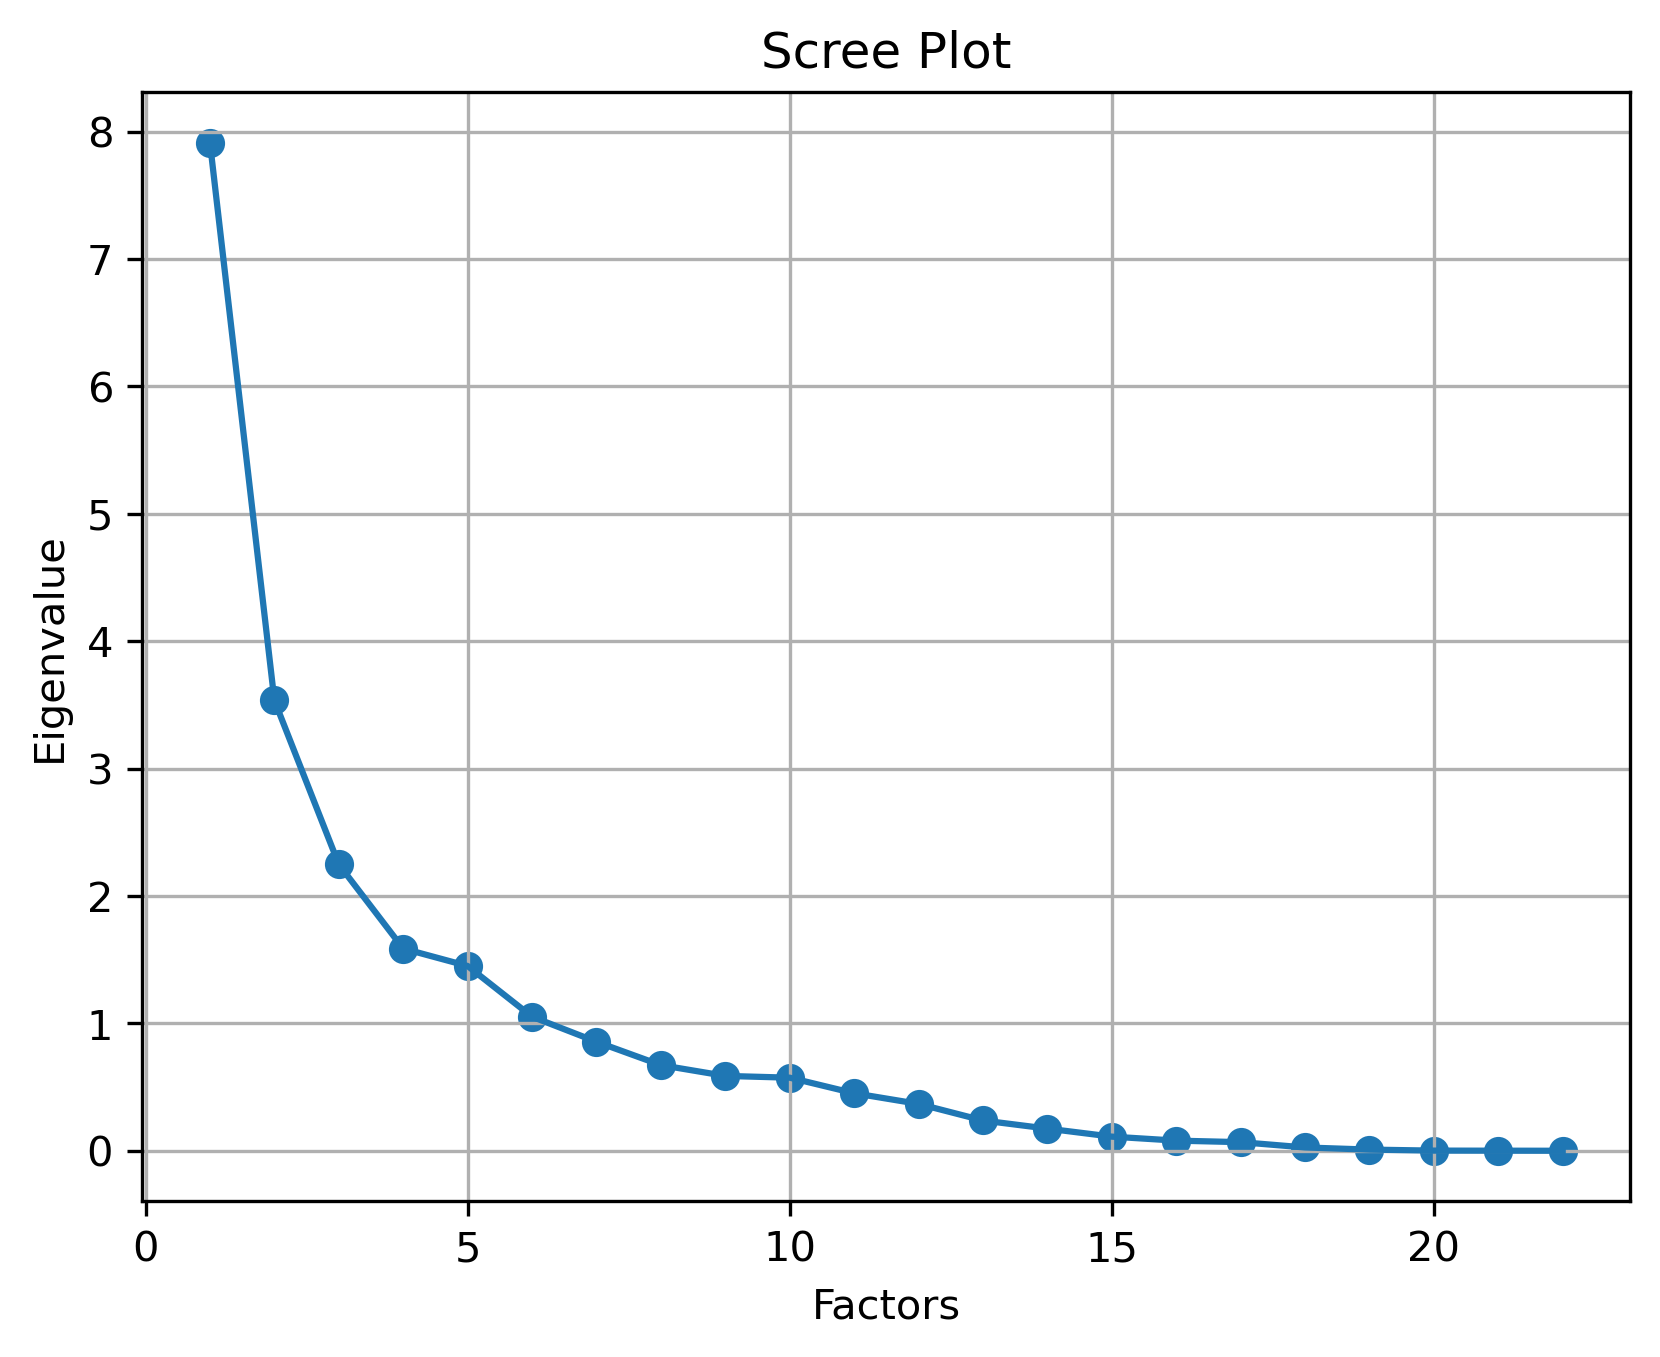

In [7]:
# 스크리 도표 시각화

plt.scatter(range(1,df_minmax.shape[1]+1),ev)
plt.plot(range(1,df_minmax.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#스크리그림을 보면 4개의 요인 지점 이후 경사가 급격히 감소하기 때문에 4개의 요인을 선정하는 것이 적절한 것으로 판단된다.

In [8]:
# 요인 수 선정 및 요인-변수 간 요인적재값 확인

fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(df_minmax)
factor_loadings = pd.DataFrame(fa.loadings_, index=df_minmax.columns)
factor_loadings

#최종적으로 설정한 4개의 요인으로 변수 간의 상관관계(요인 적재 값)을 확인한다.
#상관관계는 -+1에 가까울수록 높기에 각 요인별로 성격이 유사한 변수들을 찾아낼 수 있다.
#G칼럼의 경우 2번 요인과 가장 높은 상관관계를 갖는 것을 알 수 있다.

,0,1,2,3
G,0.280363,-0.120974,0.823695,0.054468
MP,0.235239,-0.114616,0.820694,0.349032
PER,0.832268,0.305573,0.147761,0.411650
TS%,0.746473,0.103235,0.151836,0.069871
3PAr,-0.015289,-0.593922,0.004644,-0.180311
FTr,0.087057,0.356382,-0.173463,0.112161
ORB%,0.042655,0.785599,-0.047214,-0.058840
DRB%,0.105775,0.711622,0.131665,-0.009666
TRB%,0.076869,0.971609,0.092116,-0.049174
AST%,0.072484,-0.176681,0.082553,0.571263


<AxesSubplot:>

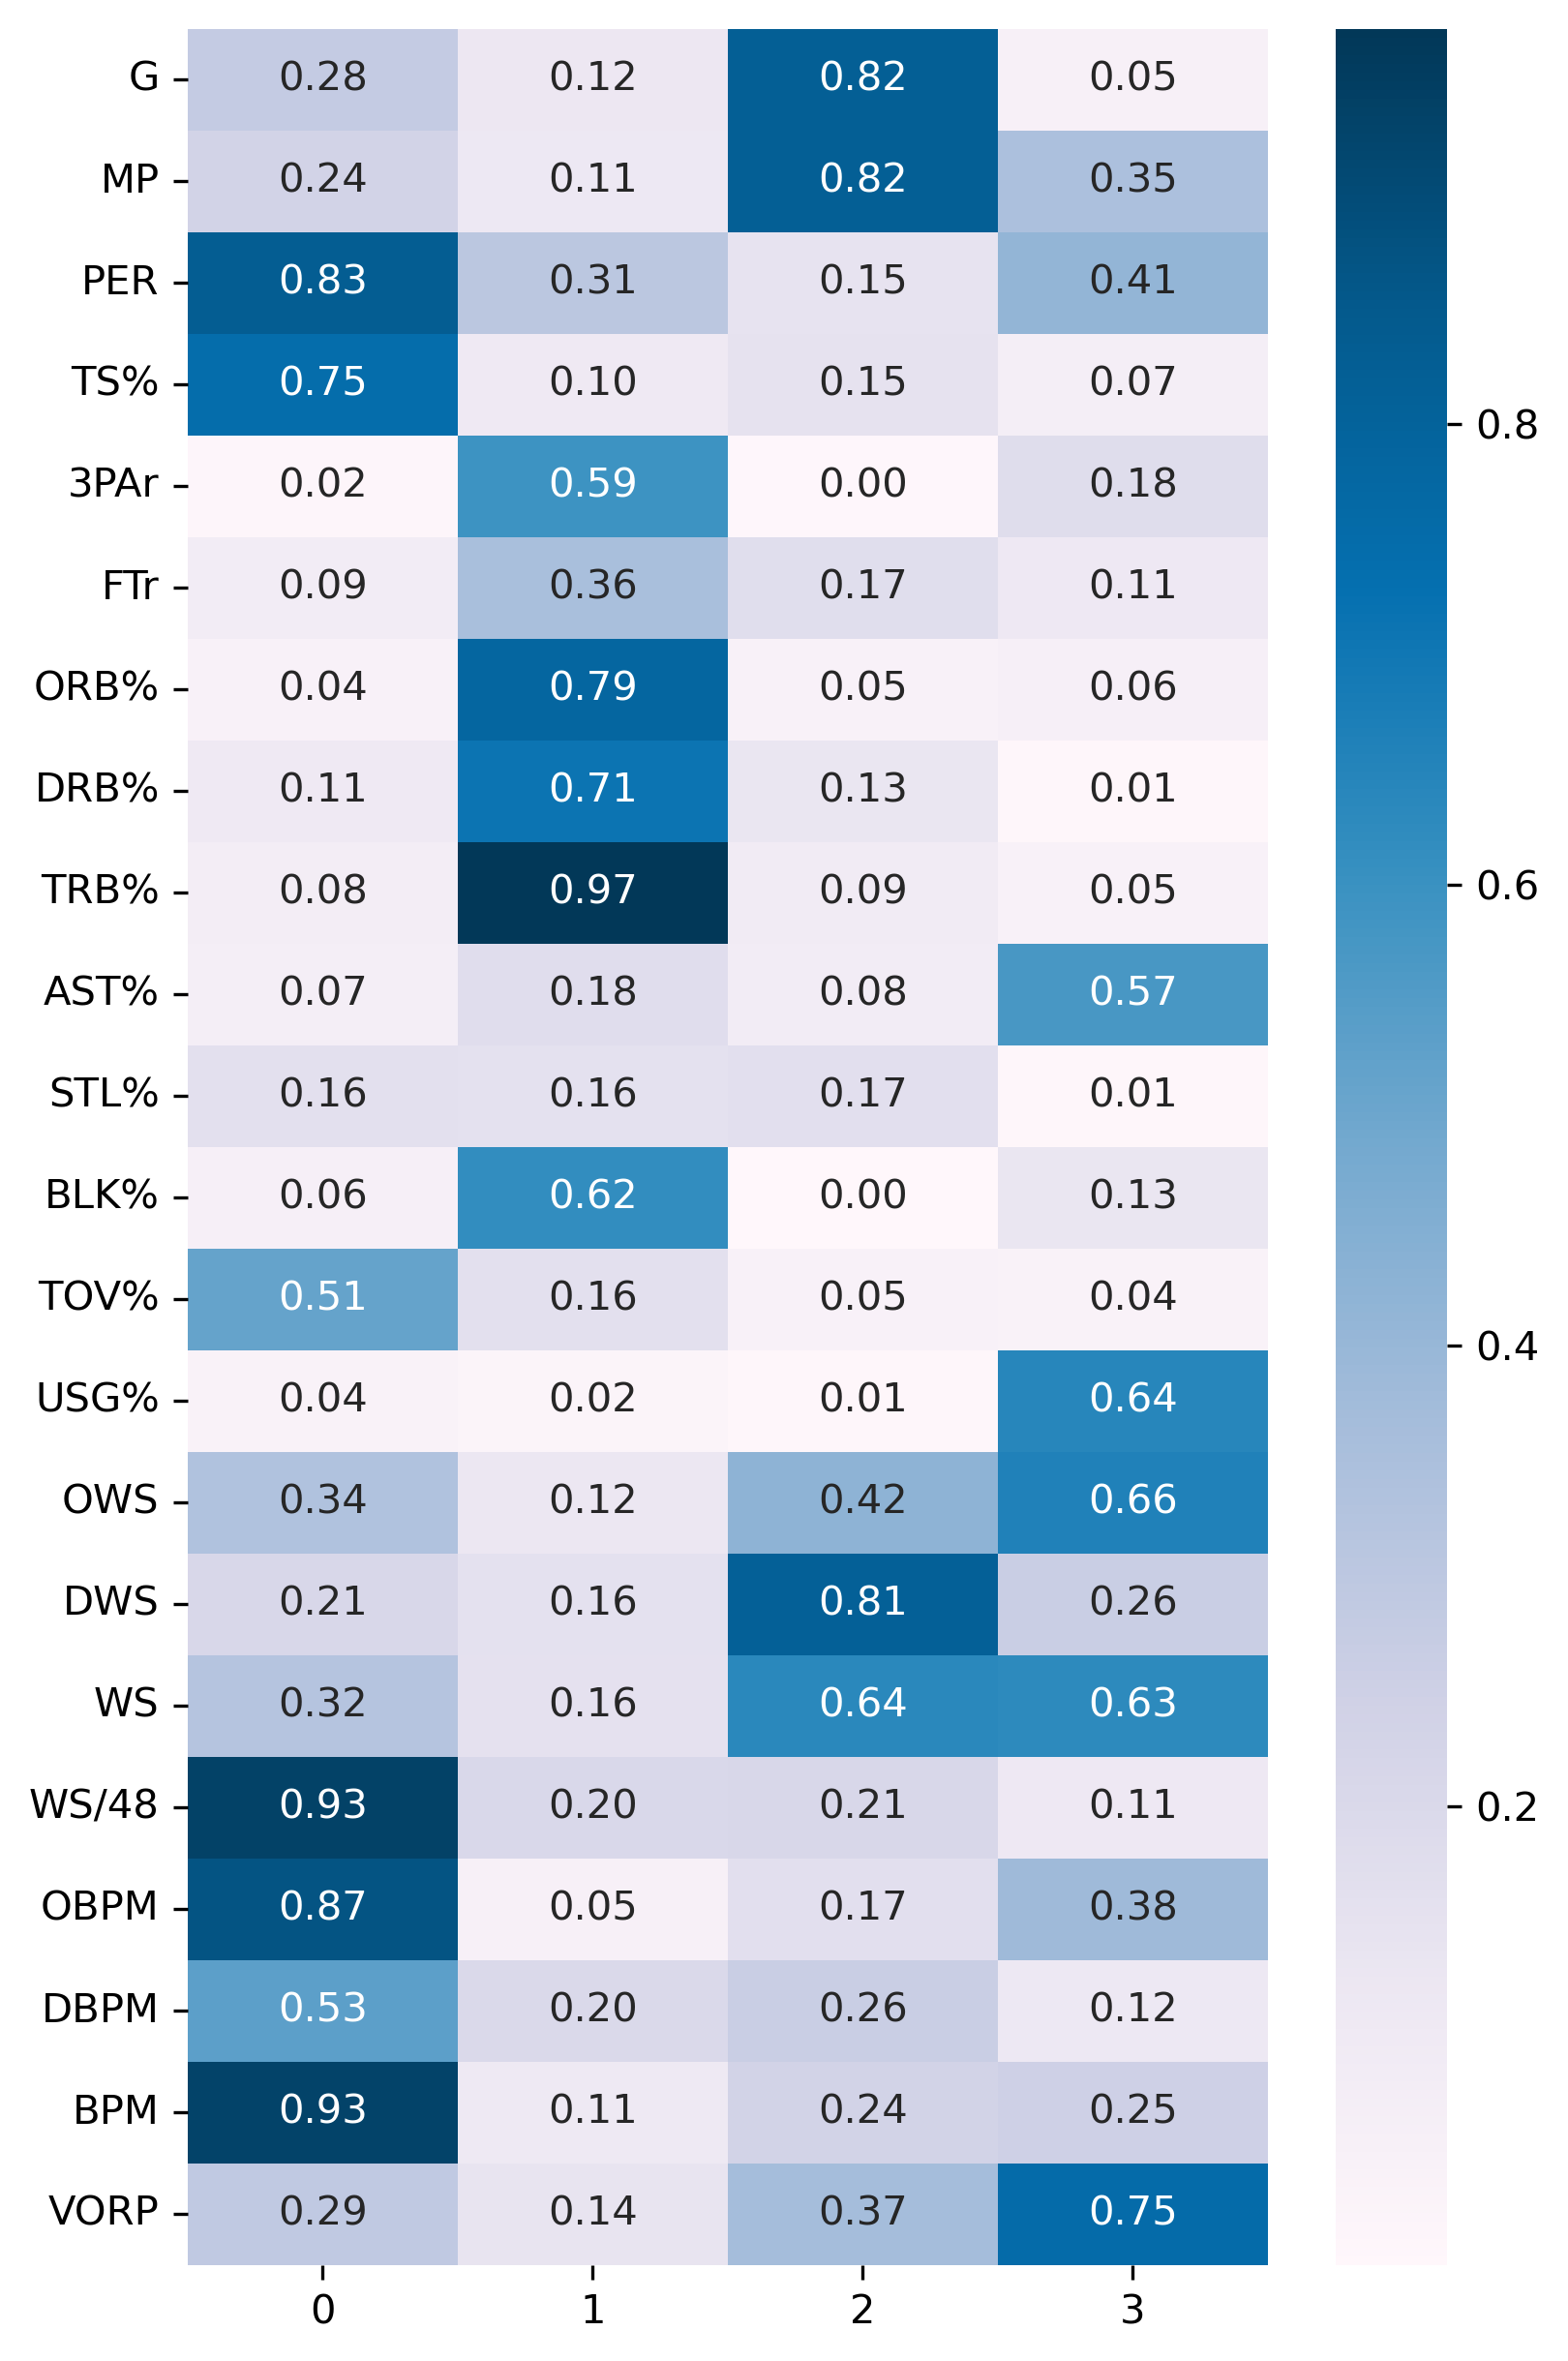

In [9]:
# 변수 간 요인적재값 시각화

plt.figure(figsize=(6,10))
sns.heatmap(abs(factor_loadings), cmap="PuBu", annot=True, fmt='.2f')

# 절대값으로 봐야함

#단순한 테이블 형태는 요인별로 주요변수를 확인하기 어렵기 때문에 채도를 적용한 시각화를 한다.
#주의할 점은 -+1에 가까운지 표현하기 위해 abs로 절대값으로 시각화했다.
#이를 통해 직관적으로 확인 가능하다.